In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
#data from kaggle dataset: "Prediction of music genre"
data1 = pd.read_csv("/Users/anniepang/Downloads/music_genre.csv")
#data from kaggle data set: "Spotify Tracks Dataset"
data2 = pd.read_csv("/Users/anniepang/Downloads/dataset.csv")

In [3]:
data1.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [4]:
data2.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# Data Cleaning

## Cleaned data 1 "tempo" column

In [5]:
data1['tempo'] = data1['tempo'].replace({'\?': ''}, regex=True)

# Convert the 'Tempo' column to numeric 
data1['tempo'] = pd.to_numeric(data1['tempo'], errors='coerce')

# Now 'Tempo' column contains values without "?"

print(len(data1[data1["tempo"] == "?"]))
print(len(data1))


0
50005


# converted categorical values to numerical values

In [6]:
labelencoder = LabelEncoder()
data1['key_num'] = labelencoder.fit_transform(data1['key'])
# data1['mode_num'] = labelencoder.fit_transform(data1['mode'])
# data1['music_genre_num'] = labelencoder.fit_transform(data1['music_genre'])
# data2['explicit_num'] = labelencoder.fit_transform(data2['explicit'])
# data2['track_genre_num'] = labelencoder.fit_transform(data2['track_genre'])
data1['key_num']

0         1
1         5
2        11
3         4
4         9
         ..
50000     4
50001     2
50002     5
50003    10
50004     9
Name: key_num, Length: 50005, dtype: int64

## Dropped missing values

In [7]:
data1_cleaned = data1.dropna()
data2_cleaned = data2.dropna()

# Random Forest Model 

In [8]:
data1.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,key_num
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic,1
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic,5
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic,11
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic,4
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic,9


In [9]:
data2.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [10]:
X_data1 = data1_cleaned.drop(['instance_id', 'artist_name', 'track_name', 'obtained_date', 'music_genre',"key"], axis=1)
# "energy", "instrumentalness", "key", "mode", "speechiness", "tempo"], axis=1)
y_data1 = data1_cleaned['music_genre']

X_data2 = data2_cleaned.drop(['track_id', 'artists', 'album_name', 'track_name', 'time_signature', 'track_genre'], axis=1)
#"energy", "key", "mode", "speechiness", "instrumentalness", "tempo", "time_signature"], axis=1)
y_data2 = data2_cleaned['track_genre']

In [11]:
# Encode categorical variables 
label_encoder = LabelEncoder()
X_data1['mode'] = label_encoder.fit_transform(X_data1['mode'])
X_data2['mode'] = label_encoder.fit_transform(X_data2['mode'])


In [12]:
# Split the data into training and testing sets
X_train_data1, X_test_data1, y_train_data1, y_test_data1 = train_test_split(X_data1, y_data1, test_size=0.2, random_state=42)
X_train_data2, X_test_data2, y_train_data2, y_test_data2 = train_test_split(X_data2, y_data2, test_size=0.2, random_state=42)

In [13]:
# Initialize the Random Forest classifier
rf_classifier_data1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_data2 = RandomForestClassifier(n_estimators=100, random_state=42)

In [14]:
# Train the model for data1
rf_classifier_data1.fit(X_train_data1, y_train_data1)

# Train the model for data2
rf_classifier_data2.fit(X_train_data2, y_train_data2)

# Make predictions on the test sets
y_pred_data1 = rf_classifier_data1.predict(X_test_data1)
y_pred_data2 = rf_classifier_data2.predict(X_test_data2)

Baseline model:

Accuracy for Data 1: 0.55
Classification Report for Data 1:
              precision    recall  f1-score   support

 Alternative       0.39      0.37      0.38       856
       Anime       0.78      0.78      0.78       919
       Blues       0.59      0.53      0.56       873
   Classical       0.84      0.85      0.85       881
     Country       0.59      0.59      0.59       921
  Electronic       0.66      0.59      0.62       931
     Hip-Hop       0.34      0.36      0.35       905
        Jazz       0.54      0.51      0.53       888
         Rap       0.34      0.32      0.33       914
        Rock       0.47      0.61      0.53       916

    accuracy                           0.55      9004
   macro avg       0.55      0.55      0.55      9004
weighted avg       0.55      0.55      0.55      9004



<Figure size 1000x800 with 0 Axes>

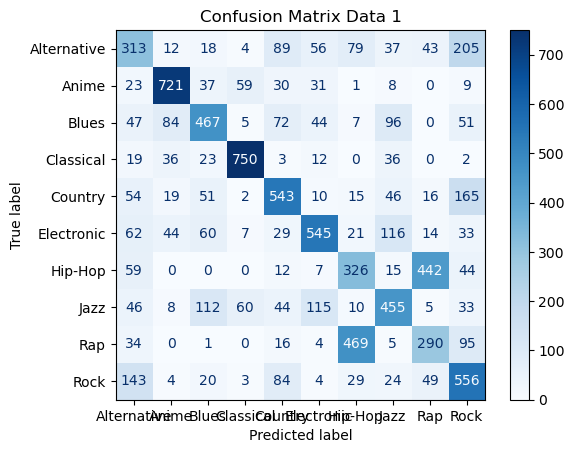


Accuracy for Data 2: 0.82
Classification Report for Data 2:
                   precision    recall  f1-score   support

         acoustic       0.99      0.99      0.99       213
         afrobeat       0.95      0.99      0.97       203
         alt-rock       0.74      0.79      0.76       215
      alternative       0.71      0.76      0.73       184
          ambient       0.93      0.93      0.93       197
            anime       0.89      0.83      0.86       193
      black-metal       0.95      0.92      0.94       210
        bluegrass       0.93      0.97      0.95       205
            blues       0.75      0.71      0.73       214
           brazil       0.78      0.86      0.82       197
        breakbeat       0.94      0.93      0.94       199
          british       0.78      0.70      0.73       214
         cantopop       0.84      0.94      0.89       193
    chicago-house       0.95      0.95      0.95       206
         children       0.88      0.86      0.87     

<Figure size 10000x8000 with 0 Axes>

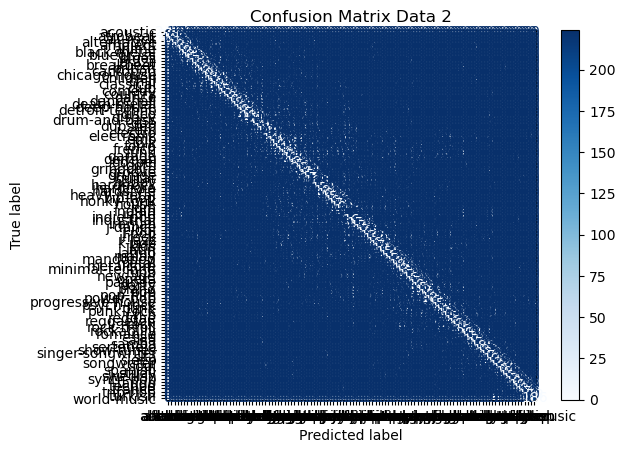

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Evaluate the models for data1
accuracy_data1 = accuracy_score(y_test_data1, y_pred_data1)
print(f"Accuracy for Data 1: {accuracy_data1:.2f}")

# Print classification report for data1
print("Classification Report for Data 1:")
print(classification_report(y_test_data1, y_pred_data1))

cm_val1 = confusion_matrix(y_test_data1, y_pred_data1)
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay(confusion_matrix=cm_val1, display_labels=np.unique(y_test_data1)).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix Data 1')
plt.show()

# Print confusion matrix for data1
# print("Confusion Matrix for Data 1:")
# print(confusion_matrix(y_test_data1, y_pred_data1))

# Evaluate the models for data2
accuracy_data2 = accuracy_score(y_test_data2, y_pred_data2)
print(f"\nAccuracy for Data 2: {accuracy_data2:.2f}")

# Print classification report for data2
print("Classification Report for Data 2:")
print(classification_report(y_test_data2, y_pred_data2))

cm_val2 = confusion_matrix(y_test_data2, y_pred_data2)
plt.figure(figsize=(100, 80))
ConfusionMatrixDisplay(confusion_matrix=cm_val2, display_labels=np.unique(y_test_data2)).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix Data 2')
plt.show()

# Print confusion matrix for data2
# print("Confusion Matrix for Data 2:")
# print(confusion_matrix(y_test_data2, y_pred_data2))

In [16]:
# Print confusion matrix for data1
print("Confusion Matrix for Data 1:")
print(confusion_matrix(y_test_data1, y_pred_data1))

Confusion Matrix for Data 1:
[[313  12  18   4  89  56  79  37  43 205]
 [ 23 721  37  59  30  31   1   8   0   9]
 [ 47  84 467   5  72  44   7  96   0  51]
 [ 19  36  23 750   3  12   0  36   0   2]
 [ 54  19  51   2 543  10  15  46  16 165]
 [ 62  44  60   7  29 545  21 116  14  33]
 [ 59   0   0   0  12   7 326  15 442  44]
 [ 46   8 112  60  44 115  10 455   5  33]
 [ 34   0   1   0  16   4 469   5 290  95]
 [143   4  20   3  84   4  29  24  49 556]]


Tried to improve: using normalization

Accuracy for Data 1: 0.56
Classification Report for Data 1:
              precision    recall  f1-score   support

 Alternative       0.40      0.38      0.39       856
       Anime       0.78      0.79      0.78       919
       Blues       0.60      0.54      0.57       873
   Classical       0.86      0.86      0.86       881
     Country       0.60      0.59      0.59       921
  Electronic       0.67      0.59      0.62       931
     Hip-Hop       0.35      0.36      0.35       905
        Jazz       0.55      0.53      0.54       888
         Rap       0.34      0.33      0.33       914
        Rock       0.46      0.61      0.53       916

    accuracy                           0.56      9004
   macro avg       0.56      0.56      0.56      9004
weighted avg       0.56      0.56      0.56      9004



<Figure size 1000x800 with 0 Axes>

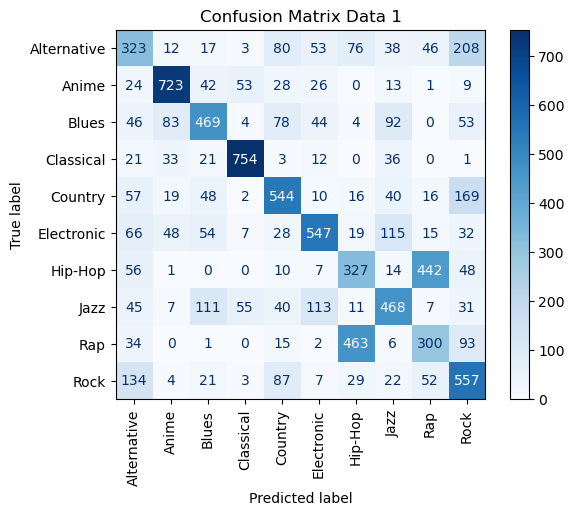

Confusion Matrix for Data 1:
[[323  12  17   3  80  53  76  38  46 208]
 [ 24 723  42  53  28  26   0  13   1   9]
 [ 46  83 469   4  78  44   4  92   0  53]
 [ 21  33  21 754   3  12   0  36   0   1]
 [ 57  19  48   2 544  10  16  40  16 169]
 [ 66  48  54   7  28 547  19 115  15  32]
 [ 56   1   0   0  10   7 327  14 442  48]
 [ 45   7 111  55  40 113  11 468   7  31]
 [ 34   0   1   0  15   2 463   6 300  93]
 [134   4  21   3  87   7  29  22  52 557]]


In [17]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Create a pipeline for data1 with normalization
pipeline_data1 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Create a pipeline for data2 with normalization
pipeline_data2 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model for data1
pipeline_data1.fit(X_train_data1, y_train_data1)

# Train the model for data2
pipeline_data2.fit(X_train_data2, y_train_data2)

# Make predictions on the test sets
y_pred_data1 = pipeline_data1.predict(X_test_data1)
y_pred_data2 = pipeline_data2.predict(X_test_data2)

# Evaluate the models for data1
accuracy_data1 = accuracy_score(y_test_data1, y_pred_data1)
print(f"Accuracy for Data 1: {accuracy_data1:.2f}")

# Print classification report for data1
print("Classification Report for Data 1:")
print(classification_report(y_test_data1, y_pred_data1))

cm_val1 = confusion_matrix(y_test_data1, y_pred_data1)
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay(confusion_matrix=cm_val1, display_labels=np.unique(y_test_data1)).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix Data 1')
plt.xticks(rotation=90)
plt.show()

# Print confusion matrix for data1
print("Confusion Matrix for Data 1:")
print(confusion_matrix(y_test_data1, y_pred_data1))



# Print confusion matrix for data2
# print("Confusion Matrix for Data 2:")
# print(confusion_matrix(y_test_data2, y_pred_data2))


In [18]:
# Evaluate the models for data2
accuracy_data2 = accuracy_score(y_test_data2, y_pred_data2)
print(f"\nAccuracy for Data 2: {accuracy_data2:.2f}")

# Print classification report for data2
print("Classification Report for Data 2:")
print(classification_report(y_test_data2, y_pred_data2))

# cm_val2 = confusion_matrix(y_test_data2, y_pred_data2)
# plt.figure(figsize=(1000, 800))
# ConfusionMatrixDisplay(confusion_matrix=cm_val2, display_labels=np.unique(y_test_data2)).plot(cmap='Blues', values_format='d')
# plt.title('Confusion Matrix Data 2')
# plt.xticks(rotation=90)
# plt.show()


Accuracy for Data 2: 0.82
Classification Report for Data 2:
                   precision    recall  f1-score   support

         acoustic       0.99      1.00      0.99       213
         afrobeat       0.95      0.97      0.96       203
         alt-rock       0.73      0.79      0.76       215
      alternative       0.70      0.74      0.72       184
          ambient       0.93      0.93      0.93       197
            anime       0.91      0.84      0.87       193
      black-metal       0.95      0.92      0.93       210
        bluegrass       0.93      0.97      0.95       205
            blues       0.75      0.71      0.73       214
           brazil       0.76      0.87      0.82       197
        breakbeat       0.94      0.94      0.94       199
          british       0.78      0.68      0.73       214
         cantopop       0.82      0.93      0.87       193
    chicago-house       0.95      0.95      0.95       206
         children       0.87      0.87      0.87     

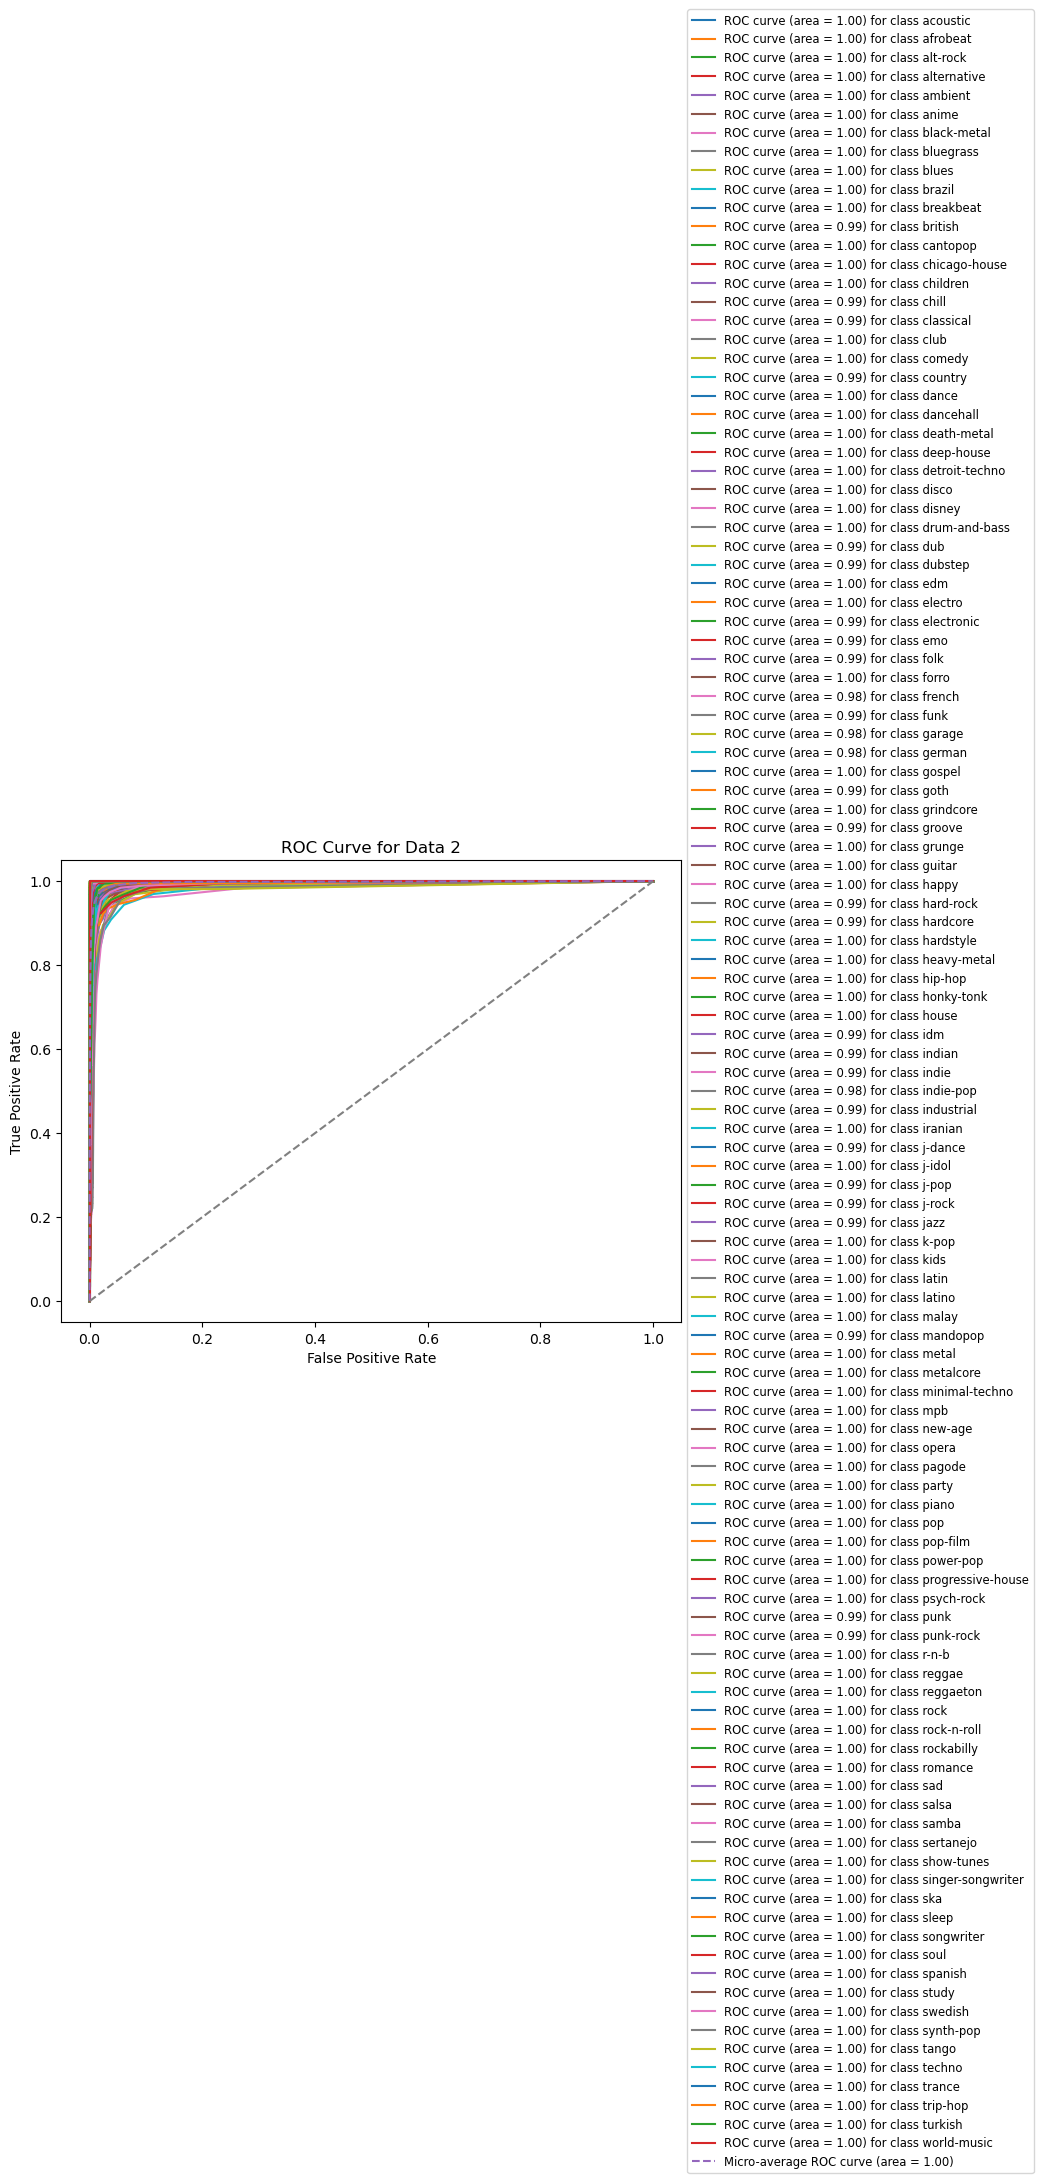

In [20]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Convert multiclass labels to binary format
lb = LabelBinarizer()
lb.fit(y_test_data2)
y_test_data2_binary = lb.transform(y_test_data2)

# Calculate probabilities for each class
y_prob_data2 = rf_classifier_data2.predict_proba(X_test_data2)

# Calculate ROC Curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_data2_binary[:, i], y_prob_data2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_data2_binary.ravel(), y_prob_data2.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
for i in range(len(lb.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {lb.classes_[i]}')
plt.plot(fpr_micro, tpr_micro, label=f'Micro-average ROC curve (area = {roc_auc_micro:.2f})', linestyle='--')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Data 2')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')  # Move legend outside the graph
plt.show()


In [19]:
# # Function to plot a more readable confusion matrix with larger figure size
# def plot_confusion_matrix_readable_larger(y_true, y_pred, classes, title):
#     cm = confusion_matrix(y_true, y_pred, labels=classes)
#     plt.figure(figsize=(12, 10))
#     sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes, cbar=False)

#     plt.title(title)
#     plt.xlabel('Predicted Label', fontsize=12)
#     plt.ylabel('True Label', fontsize=12)
    
#     plt.xticks(rotation=90, ha='right', fontsize=10)
#     plt.yticks(rotation=0, ha='right', fontsize=10)
    
#     plt.show()

# # Plot a more readable confusion matrix for Data 2 with larger figure size
# plot_confusion_matrix_readable_larger(y_test_data2, y_pred_data2, classes=data2['track_genre'].unique(), title='Confusion Matrix - Data 2')


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3da032f1-e5ab-4726-ac09-eb3d9c053730' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>